In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
import pandas as pd

chunks = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1', chunksize=100000)
df = pd.concat(chunks)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [55]:
df.describe ()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [56]:
# 1️⃣ Show missing values in numerical columns
print("🔍 Missing Values in Numerical Columns:")
print(df[['Quantity', 'UnitPrice', 'CustomerID']].isnull().sum())

🔍 Missing Values in Numerical Columns:
Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64


In [57]:
# 2️⃣ Show percentage of missing values in numerical columns
print("\n📊 Percentage of Missing Values:")
print(df[['Quantity', 'UnitPrice', 'CustomerID']].isnull().mean() * 100)



📊 Percentage of Missing Values:
Quantity       0.000000
UnitPrice      0.000000
CustomerID    24.926694
dtype: float64


In [58]:
# 3️⃣ Check for duplicate rows (across entire dataset)
duplicate_rows = df.duplicated()
print(f"\n📋 Total Duplicate Rows in Dataset: {duplicate_rows.sum()}")


📋 Total Duplicate Rows in Dataset: 5268


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


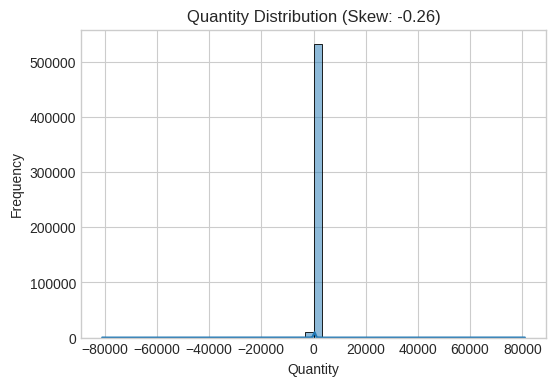

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


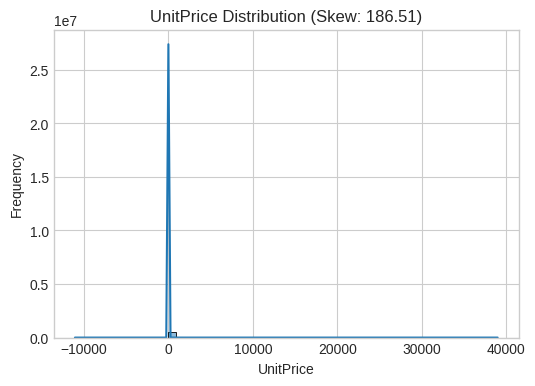

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


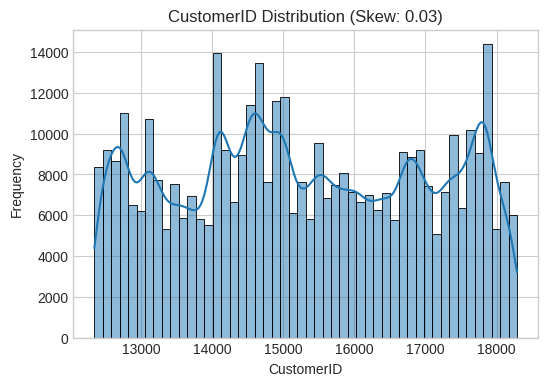

In [59]:
# Plot and check skewness of numerical columns
numerical_cols = ['Quantity', 'UnitPrice', 'CustomerID']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'{col} Distribution (Skew: {df[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [60]:
from scipy.stats import shapiro, normaltest

# Select numerical columns
numerical_cols = ['Quantity', 'UnitPrice', 'CustomerID']

for col in numerical_cols:
    print(f"\n📊 Normality Check for: {col}")
    
    # Drop missing values
    data = df[col].dropna()

    # 1. Shapiro-Wilk Test (best for <5000)
    if len(data) <= 5000:
        stat, p = shapiro(data)
        print(f"🔹 Shapiro-Wilk Test: p-value = {p:.4f}")
    else:
        print("🔹 Shapiro-Wilk Test skipped (too many values)")

    # 2. D’Agostino and Pearson’s Test
    stat, p = normaltest(data)
    print(f"🔹 D’Agostino’s K² Test: p-value = {p:.4f}")
    
    # Interpretation
    if p > 0.05:
        print("✅ Likely Normal Distribution")
    else:
        print("❌ Not Normally Distributed (Skewed)")



📊 Normality Check for: Quantity
🔹 Shapiro-Wilk Test skipped (too many values)
🔹 D’Agostino’s K² Test: p-value = 0.0000
❌ Not Normally Distributed (Skewed)

📊 Normality Check for: UnitPrice
🔹 Shapiro-Wilk Test skipped (too many values)
🔹 D’Agostino’s K² Test: p-value = 0.0000
❌ Not Normally Distributed (Skewed)

📊 Normality Check for: CustomerID
🔹 Shapiro-Wilk Test skipped (too many values)
🔹 D’Agostino’s K² Test: p-value = 0.0000
❌ Not Normally Distributed (Skewed)


In [61]:
# Fill missing CustomerID values with the median
df['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)


/tmp/ipykernel_36/903633380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)


In [62]:
# 1,454 missing values
#That’s about 0.27% of the dataset (very small)

# Fill missing descriptions with a placeholder
df['Description'].fillna('No Description', inplace=True)


/tmp/ipykernel_36/2001179102.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('No Description', inplace=True)


In [63]:
# Check again for missing values
print("Missing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [64]:
# View duplicate rows
duplicates = df[df.duplicated()]   # # this is the rows whihc are not fully duplicated so 
                                    #not consider as duplicated rows 
print(duplicates.head(10))


    InvoiceNo StockCode                        Description  Quantity  \
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
587    536412     22273               FELTCRAFT DOLL MOLLY         1   
589    536412     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
594    536412     22141     CHRISTMAS CRAFT TREE TOP ANGEL         1   
598    536412     21448          12 DAISY PEGS IN WOOD BOX         1   
600    536412     22569        FELTCRAFT CUSHION BUTTERFLY         2   

         InvoiceDate  UnitPrice  CustomerID         Country  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
537  12/1/2010 11:45 

In [65]:
# Show TRUE duplicates (all columns exactly the same)
duplicates = df[df.duplicated(keep=False)]
print(duplicates.head(10))
                                       # this are fully duplicated rows and need to remove 

    InvoiceNo StockCode                        Description  Quantity  \
485    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
494    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
521    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
548    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
485  12/1/2010 11:45       4.95     17908.0  United Kingdom  
489  12/1/2010 11:45       2.10     17908.0  United Kingdom  
494  12/1/2010 11:45 

In [66]:
# Check how many fully duplicate rows you have
print("Fully duplicate rows before:", df.duplicated().sum())

# Remove them
df.drop_duplicates(keep='first', inplace=True)

# Check again
print("Fully duplicate rows after:", df.duplicated().sum())


Fully duplicate rows before: 5268
Fully duplicate rows after: 0


In [67]:
#handling outliers now 
# Analyzing the top selling product so making dataset prepare for it 

import pandas as pd


# --- Step 1: Define IQR-based Flagging Function ---
def flag_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a True/False column marking outliers
    df[f'{column}_outlier'] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return df

# --- Step 2: Define Winsorization (Capping) Function ---
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    
    # Create a capped version of the column
    df[f'{column}_capped'] = df[column].clip(lower, upper)
    return df

# --- Step 3: Apply to Quantity ---
df = flag_outliers_iqr(df, 'Quantity')
df = cap_outliers(df, 'Quantity')

# --- Step 4: Apply to UnitPrice ---
df = flag_outliers_iqr(df, 'UnitPrice')
df = cap_outliers(df, 'UnitPrice')


# Optional: Check how many outliers you flagged
print("Quantity outliers:", df['Quantity_outlier'].sum())
print("UnitPrice outliers:", df['UnitPrice_outlier'].sum())

# Example: Group by Product Description using capped values
top_products = (
    df.groupby('Description')['Quantity_capped']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Products (based on capped Quantity):")
print(top_products)


Quantity outliers: 58501
UnitPrice outliers: 39450

Top 10 Products (based on capped Quantity):
Description
JUMBO BAG RED RETROSPOT               37776
ASSORTED COLOUR BIRD ORNAMENT         28363
WHITE HANGING HEART T-LIGHT HOLDER    28209
WORLD WAR 2 GLIDERS ASSTD DESIGNS     27817
PACK OF 72 RETROSPOT CAKE CASES       26599
VICTORIAN GLASS HANGING T-LIGHT       20803
POPCORN HOLDER                        20697
LUNCH BAG RED RETROSPOT               18816
RABBIT NIGHT LIGHT                    18790
PARTY BUNTING                         17520
Name: Quantity_capped, dtype: int64


/tmp/ipykernel_36/809694798.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


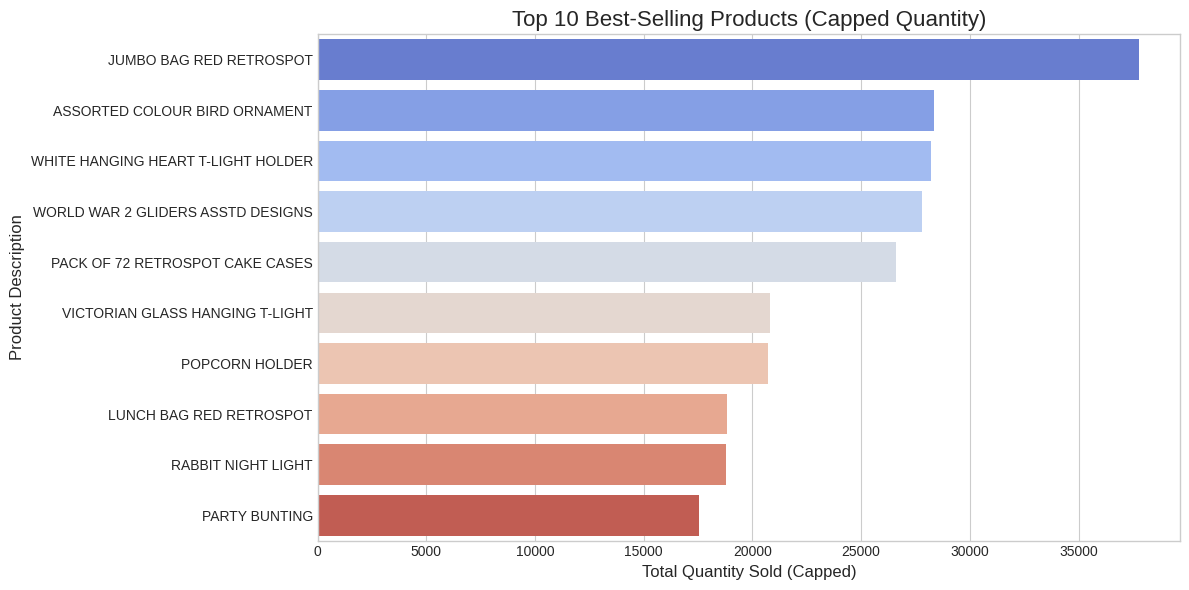

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure this is set for better visuals
plt.style.use('seaborn-whitegrid')

# --- Select Top 10 Products (already done) ---
top_products = (
    df.groupby('Description')['Quantity_capped']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# --- Plot the Bar Chart ---
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')

plt.title('Top 10 Best-Selling Products (Capped Quantity)', fontsize=16)
plt.xlabel('Total Quantity Sold (Capped)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.tight_layout()
plt.show()


In [69]:
df['TotalSales'] = df['Quantity_capped'] * df['UnitPrice_capped']

country_sales = (
    df.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)               # top countries with respect to sales 
)

print(country_sales.head(10))


Country
United Kingdom    7525252.33
EIRE               242370.35
Germany            220158.64
Netherlands        218088.34
France             192480.62
Australia          105728.63
Switzerland         54440.52
Spain               52155.30
Belgium             40759.69
Norway              32955.99
Name: TotalSales, dtype: float64


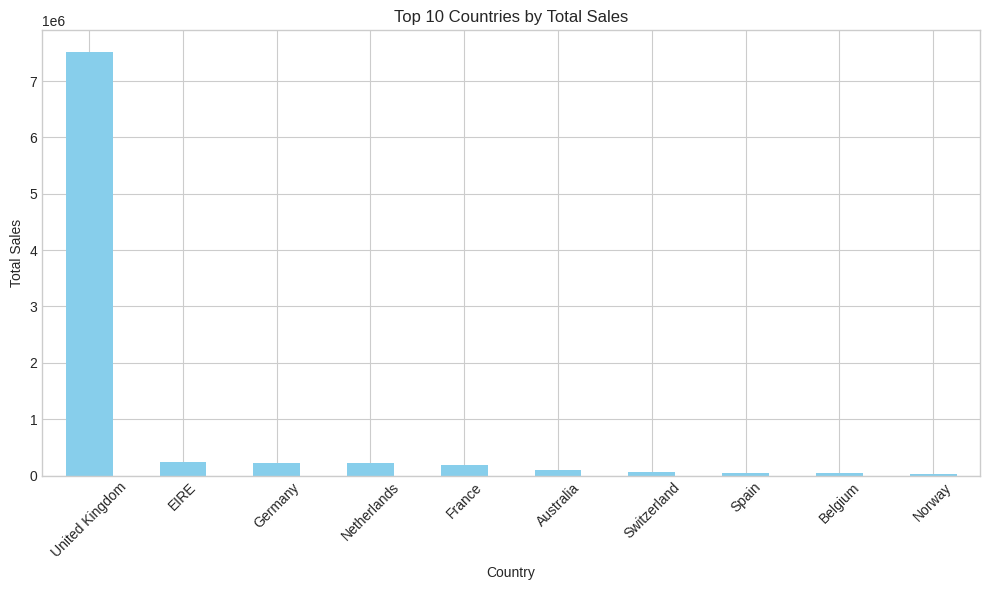

In [70]:
import matplotlib.pyplot as plt

# Plot top 10 countries
top_countries = country_sales.head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
#Calculate & Visualize Monthly Revenue Trends (Time-Series)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

monthly_revenue = (
    df.groupby('Month')['TotalSales']
    .sum()
    .reset_index()
    .sort_values('Month')
)


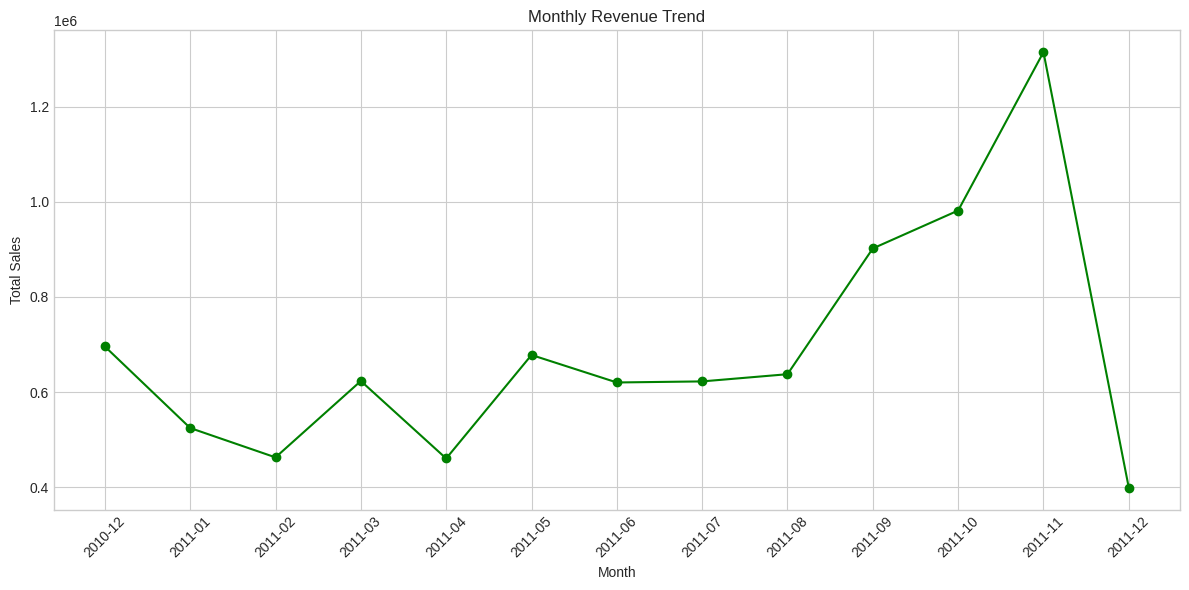

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['TotalSales'], marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_36/710957187.py:18: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


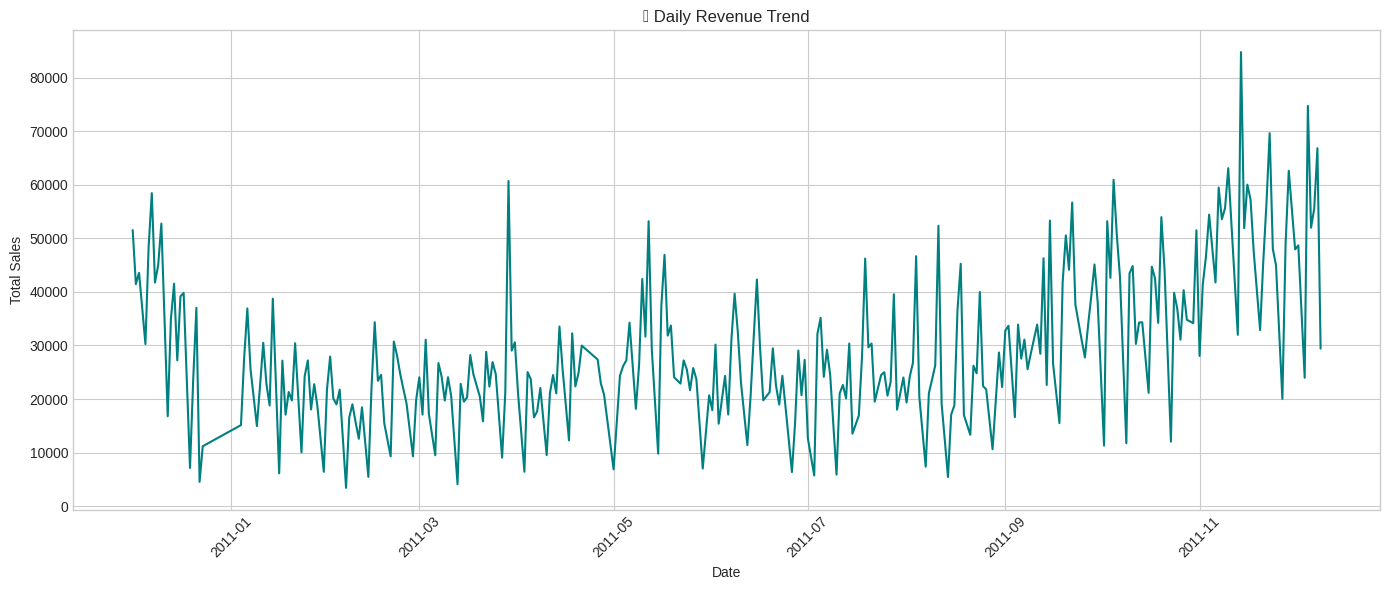

In [73]:
# Extract date only (remove time part)
df['Date'] = df['InvoiceDate'].dt.date

# Group by Date and calculate daily revenue
daily_revenue = (
    df.groupby('Date')['TotalSales']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_revenue['Date'], daily_revenue['TotalSales'], color='teal')
plt.title("📅 Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipykernel_36/306701857.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


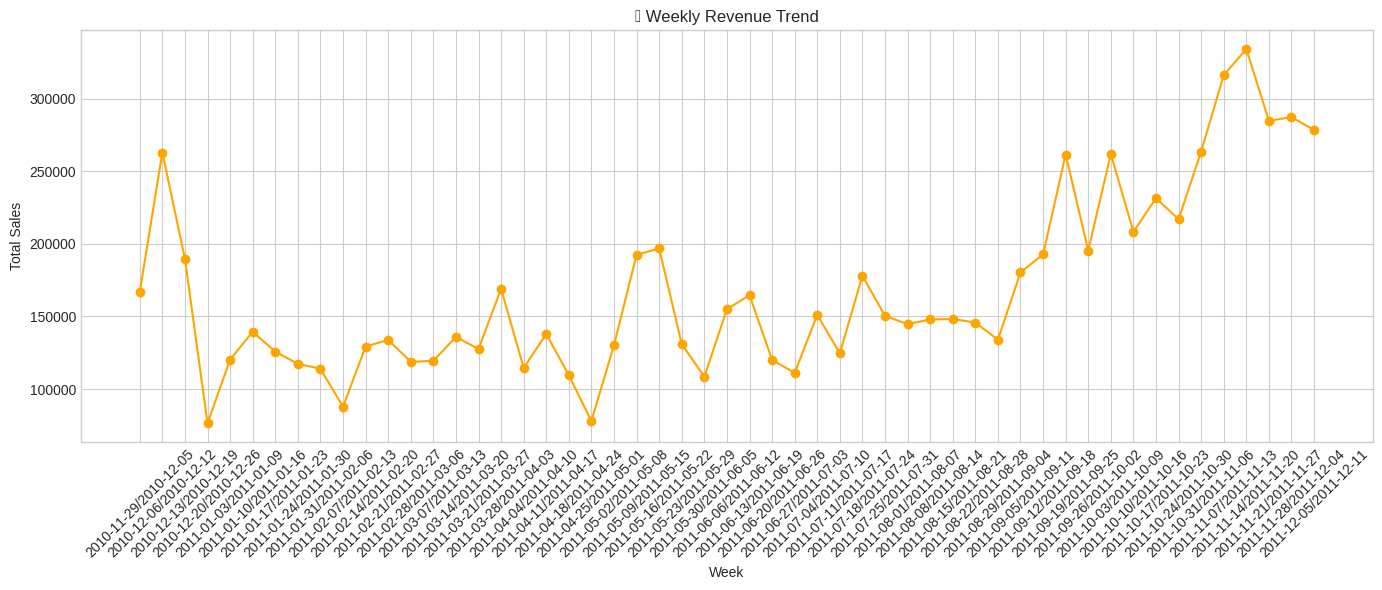

In [74]:
# Create week column
df['Week'] = df['InvoiceDate'].dt.to_period('W').astype(str)

# Group by Week and calculate revenue
weekly_revenue = (
    df.groupby('Week')['TotalSales']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(weekly_revenue['Week'], weekly_revenue['TotalSales'], marker='o', color='orange')
plt.title("📈 Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [75]:
# Reuse monthly_revenue from earlier step
top_months = (
    monthly_revenue.sort_values(by='TotalSales', ascending=False)
    .head(5)
)

print("🏆 Top 5 Revenue Months:")
print(top_months)


🏆 Top 5 Revenue Months:
      Month  TotalSales
11  2011-11  1314391.76
10  2011-10   981538.84
9   2011-09   901876.44
0   2010-12   695880.03
5   2011-05   678015.68


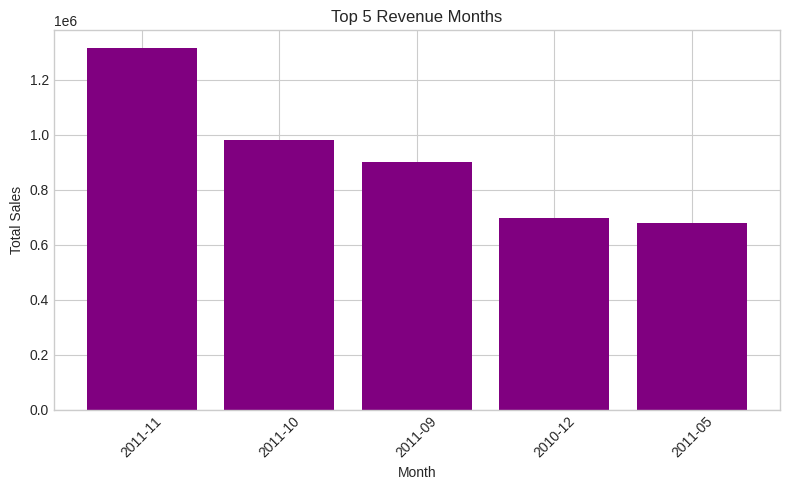

In [76]:
plt.figure(figsize=(8, 5))
plt.bar(top_months['Month'], top_months['TotalSales'], color='purple')
plt.title("Top 5 Revenue Months")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_36/4215681226.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=monthly_revenue['Month'].max(), periods=7, freq='M')[1:]
/tmp/ipykernel_36/4215681226.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


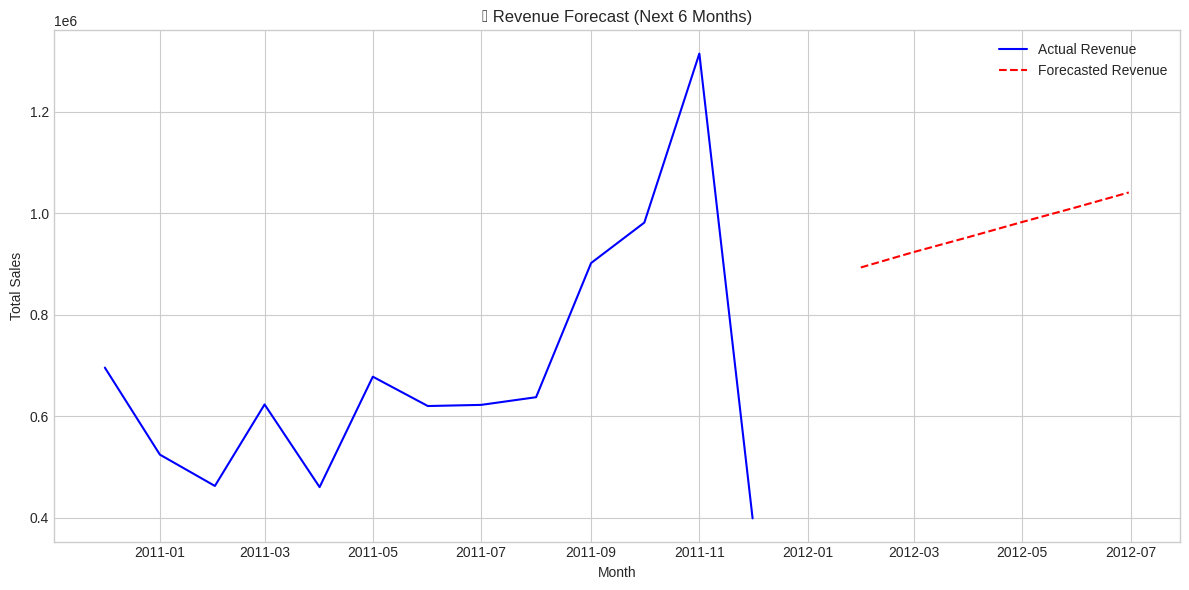

       Month  ForecastedSales
0 2012-01-31     8.931493e+05
1 2012-02-29     9.226940e+05
2 2012-03-31     9.522388e+05
3 2012-04-30     9.817836e+05
4 2012-05-31     1.011328e+06
5 2012-06-30     1.040873e+06


In [77]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert Month to datetime for sorting
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'])

# Create time index (0, 1, 2...) as numeric X values
monthly_revenue['TimeIndex'] = np.arange(len(monthly_revenue))

# Define X and y
X = monthly_revenue[['TimeIndex']]
y = monthly_revenue['TotalSales']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict next 6 months
future_index = np.arange(len(monthly_revenue), len(monthly_revenue)+6).reshape(-1, 1)
future_preds = model.predict(future_index)

# Create forecast dataframe
future_months = pd.date_range(start=monthly_revenue['Month'].max(), periods=7, freq='M')[1:]
forecast_df = pd.DataFrame({'Month': future_months, 'ForecastedSales': future_preds})

# Plot actual + forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['TotalSales'], label='Actual Revenue', color='blue')
plt.plot(forecast_df['Month'], forecast_df['ForecastedSales'], label='Forecasted Revenue', color='red', linestyle='--')
plt.title("📊 Revenue Forecast (Next 6 Months)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: View forecasted values
print(forecast_df)


In [78]:
# Step: Aggregate by Customer
cltv_df = df.groupby('CustomerID').agg({
    'InvoiceDate': ['min', 'max', 'nunique'],
    'InvoiceNo': 'nunique',
    'TotalSales': ['sum', 'mean'],
    'Quantity': 'sum'
})

# Step: Flatten MultiIndex Columns
cltv_df.columns = ['_'.join(col).strip() for col in cltv_df.columns.values]

# Step: Reset Index
cltv_df = cltv_df.reset_index()

# Show result
cltv_df.head()


,CustomerID,InvoiceDate_min,InvoiceDate_max,InvoiceDate_nunique,InvoiceNo_nunique,TotalSales_sum,TotalSales_mean,Quantity_sum
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,2,2,101.92,50.960000,0
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,7,4164.40,22.881319,2458
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,4,1464.08,47.228387,2341
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1,1453.60,19.912329,631
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,1,312.40,18.376471,197


In [80]:
# Check for NaNs or Infs in target
print("NaNs in y_train:", y_train.isna().sum())
print("Infs in y_train:", np.isinf(y_train).sum())



NaNs in y_train: 30
Infs in y_train: 0


In [81]:
# Drop rows where CLTV (target) is missing or infinite
valid_idx = y_train.notna() & ~np.isinf(y_train)
X_train = X_train[valid_idx]
y_train = y_train[valid_idx]

# Repeat for test set
valid_idx_test = y_test.notna() & ~np.isinf(y_test)
X_test = X_test[valid_idx_test]
y_test = y_test[valid_idx_test]


In [84]:
# Drop non-numeric columns (like CustomerID if included)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=1
)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [87]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.06501453524589275
RMSE: 0.15574690889088794
R2 Score: 0.9855776689065183


In [89]:
#costumer sigmentation 

import pandas as pd

# Create segments: Low, Medium, High
results = pd.DataFrame({
    'CustomerID': X_test.index,  # make sure you track index or original ID
    'Predicted_CLTV': y_pred
})

results['CLTV_Segment'] = pd.qcut(results['Predicted_CLTV'], q=3, labels=['Low', 'Medium', 'High'])

results.head()


,CustomerID,Predicted_CLTV,CLTV_Segment
0,2014,6.673113,Medium
1,457,6.095548,Medium
2,478,4.706870,Low
3,438,6.216718,Medium
4,3728,6.623742,Medium


In [90]:
results.to_csv("customer_cltv_segments.csv", index=False)
